# 30회 ADP 복원 

# 기계학습 (60점)

In [3]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols

from statsmodels.stats.stattools import jarque_bera, durbin_watson
from scipy.stats import probplot

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from statsmodels.tools.eval_measures import rmse

from sklearn.model_selection import GridSearchCV, KFold
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## 데이터 설명
- 데이터 출처 : 캐글어딘가.. 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv
- 데이터 설명 : 혈압 데이터 DBP

In [2]:
#encoding = ['utf-8','cp949','utf-8-sig','euc-kr','latin']
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv',encoding= 'cp949')
df.head()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,26,1,20.1,81,5.80,4.36,0.86,0.90,2.43,12.0,63.8,5.40
1,40,1,17.7,54,4.60,3.70,1.02,1.50,2.04,9.2,70.3,4.10
2,40,2,19.7,53,5.30,5.87,1.29,1.75,3.37,10.1,61.1,4.85
3,43,1,23.1,71,4.50,4.05,0.74,1.27,2.60,36.5,73.4,5.30
4,36,1,26.5,82,5.54,6.69,3.49,0.91,3.64,69.3,67.5,5.53


## 1-1  EDA를 시행하라 

- 데이터 샘플 확인


,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,26,1,20.1,81,5.8,4.36,0.86,0.90,2.43,12.0,63.8,5.40
1,40,1,17.7,54,4.6,3.70,1.02,1.50,2.04,9.2,70.3,4.10
2,40,2,19.7,53,5.3,5.87,1.29,1.75,3.37,10.1,61.1,4.85


- 데이터 유형 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     4303 non-null   int64  
 1   Gender  4303 non-null   int64  
 2   BMI     4303 non-null   float64
 3   DBP     4303 non-null   int64  
 4   FPG     4303 non-null   float64
 5   Chol    4302 non-null   float64
 6   Tri     4303 non-null   float64
 7   HDL     4303 non-null   float64
 8   LDL     4303 non-null   float64
 9   ALT     4303 non-null   float64
 10  CCR     4303 non-null   float64
 11  FFPG    4303 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 403.5 KB


None

- 데이터 기초통계량 확인


,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4302.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,76.360446,5.226368,4.860732,1.588476,1.666765,2.976220,26.754810,71.557080,5.729084
std,14.686155,0.477530,3.397294,11.004056,0.781089,0.925484,1.260003,1.079377,0.892196,22.279922,16.937394,1.424568
min,22.000000,1.000000,15.600000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,4.860753,3.200000
25%,35.000000,1.000000,21.700000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,60.000000,4.900000
50%,46.000000,1.000000,24.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,72.000000,5.300000
75%,59.000000,2.000000,26.300000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,82.300000,6.020000
max,93.000000,2.000000,45.800000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,307.000000,29.700000


- 데이터 결측 확인


Chol    1
dtype: int64

- 데이터 분포 시각화


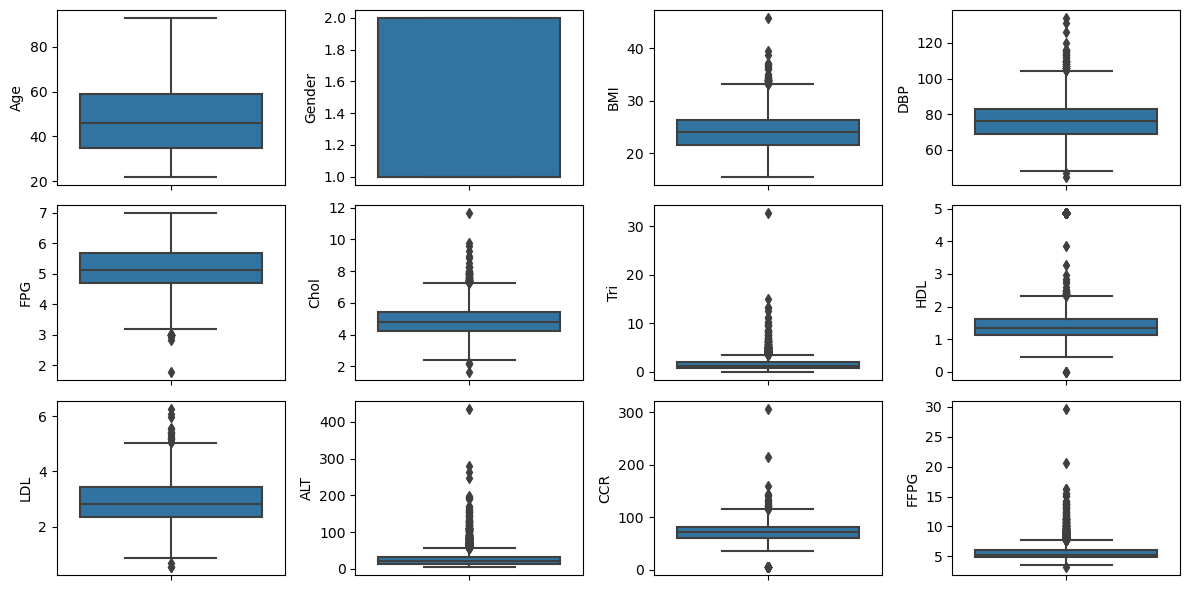

- 상관관계 확인


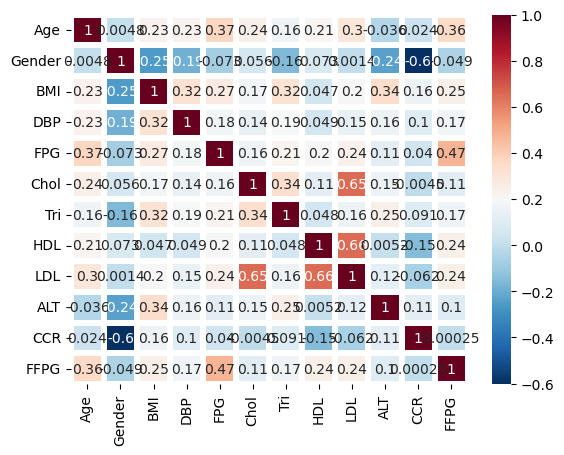

In [3]:
print('- 데이터 샘플 확인')
display(df.head(3))

print('- 데이터 유형 확인')
display(df.info())

print('- 데이터 기초통계량 확인')
display(df.describe())

print('- 데이터 결측 확인')
display(df.isna().sum()[df.isna().sum()>0])

print('- 데이터 분포 시각화')
n_row = 3
n_col = 4
fig, axs = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*2))

for r in range(0, n_row):
    for c in range(0, n_col):
        i = r*n_col+c
        if i < len(df.columns):
            sns.boxplot(y = list(df.columns)[i], data = df, ax = axs[r][c])
plt.tight_layout()
plt.show()

print('- 상관관계 확인')
df_cor = df.corr(method = 'pearson')
sns.heatmap(df_cor,
           xticklabels = df_cor.columns,
           yticklabels = df_cor.columns,
           cmap = 'RdBu_r',
           annot = True,
           linewidth = 3)
plt.show()

 #### [답안] (32분 소요)
 - 데이터 샘플과 데이터 유형을 살펴보았을때 Gender를 제외한 변수 모두 연속형이다. 
 - 데이터 기초통계량을 보면 변수별 스케일에 차이가 있다. 모델을 만들기 전 스케일링 할 필요성이 보인다.
 - 데이터 결측의 경우 Chol변수에서 1개의 결측치가 확인된다.
 - 이상치를 확인해본 결과 Tri, ALT, CCR의 경우 박스에서 크게 벗어난 점들이 있다. 이상치 처리가 필요해 보인다.
 - LDL과 Chol, HDL이 0.65이상으로 약간 높은 상관성이 보인다.


## 1-2 데이터 전처리가 필요하다면 수행하고 이유를 작성하라

In [5]:
print('- 컬럼 형변환 수행')
df['Gender'] = df['Gender'].astype('object')

print('- 결측치 처리')
df['Chol'] = df['Chol'].fillna(df['Chol'].mean())

print('- 이상치 처리')
del_idx = []
del_idx.extend(list(df[df.Tri > 30].index))
del_idx.extend(list(df[df.ALT > 400].index))
del_idx.extend(list(df[df.CCR > 200].index))
del_idx.extend(list(df[df.FFPG > 25].index))
df = df.drop(del_idx, axis = 0)


print('- 스케일링 수행')
df_scale_raw = df.select_dtypes(exclude = 'object')
scale = StandardScaler().fit(df_scale_raw)
df_scale = scale.transform(df_scale_raw)
df_scale = pd.DataFrame(df_scale,columns = df_scale_raw.columns).reset_index(drop = True)

df2 = pd.concat([df_scale, df.select_dtypes('object').reset_index(drop = True)], axis = 1)

display(df2.head(3))

- 컬럼 형변환 수행
- 결측치 처리
- 이상치 처리
- 스케일링 수행


,Age,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG,Gender
0,-1.503978,-1.184401,0.421773,0.734796,-0.542806,-0.624672,-0.710128,-0.612531,-0.685464,-0.467341,-0.234381,1
1,-0.550159,-1.890931,-2.032968,-0.801932,-1.263017,-0.485569,-0.154491,-1.049744,-0.816363,-0.071332,-1.179158,1
2,-0.550159,-1.302156,-2.123884,0.094493,1.104948,-0.250832,0.077024,0.441265,-0.774289,-0.631836,-0.634094,2


#### [답안] (21분 소요)
 - Gender의 경우 범주형 변수인데 연속형으로 되어있어 형변환을 시킨다.
 - 그리고 Chol변수에서 나타난 1개의 결측치는 평균으로 대체한다.
 - 이상치 처리는 시각화 결과를 확인하여 값이 크게 벗어난 데이터에 대해서만 이상치 수행한다.
 - 연속형 변수들이 스케일의 차이를 보였으므로 스케일링을 수행하였다.

## 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

데이터 분할
DBP컬럼 기준으로 분포 확인


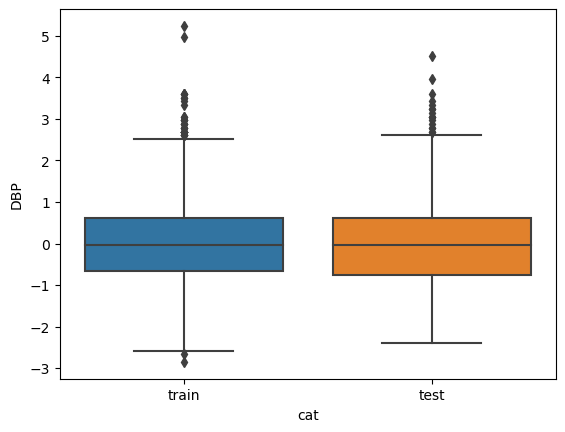

In [7]:
print('데이터 분할')
x = df2.drop('DBP', axis = 1)
y = df2.DBP
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 123, test_size = 0.3)

print('DBP컬럼 기준으로 분포 확인')
y_train_tmp = pd.DataFrame(y_train).copy()
y_test_tmp = pd.DataFrame(y_test).copy()
y_train_tmp['cat'] = 'train'
y_test_tmp['cat'] = 'test'
tmp = pd.concat([y_train_tmp, y_test_tmp], axis = 0)

sns.boxplot(x = tmp.cat, y = tmp.DBP, data = tmp)
plt.show()

#### [답안] (32분)
- 데이터 분할 후 DBP 컬럼 기준으로 상자그림으로 분포 확인 결과 train(70%)과 test(30%) 모두 비슷한 분포를 가지는 것으로 확인했다.

## 2-1 독립변수의 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오

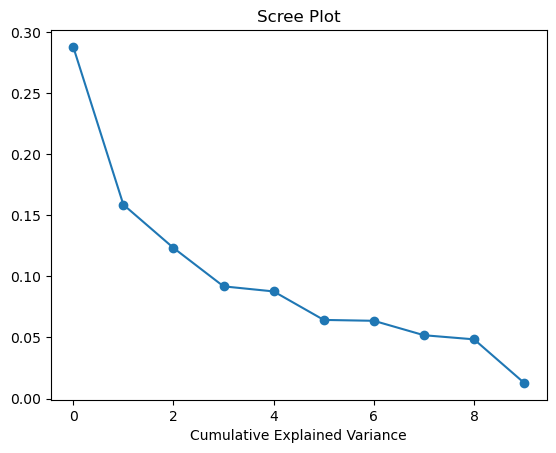

분산 설명력 :  [0.28780373 0.1586764  0.12326863 0.09180635 0.0876496  0.06432782
 0.0636093  0.05179552 0.04843041 0.01275612]
0.56974876


,pc1,pc2,pc3,DBP
0,-1.690845,-0.356689,-0.519992,0.421773
1,-2.724822,-0.665665,-0.212187,-2.032968
2,-0.449482,-1.582505,0.853058,-2.123884


In [22]:
df2_x = df2.drop('DBP', axis = 1)
pca = PCA(n_components= 10)
pca_fit = pca.fit(df2_x)

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.xlabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

print('분산 설명력 : ', pca.explained_variance_ratio_)
print(0.28780373+0.1586764+0.12326863)
n = 3
pca = PCA(n_components= n)
pca_3 = pca.fit_transform(df2_x)
df2_x_pca = pd.DataFrame(data = pca_3, columns = ['pc1', 'pc2', 'pc3'])
df2_pca = pd.concat([df2_x_pca, df2['DBP']], axis = 1)
display(df2_pca.head(3))

#### [답안] (24분)
- 앞서 독립변수별 상관관계를 살펴보았을때 0.6이상의 상관성이 있는 변수들이 두 쌍 정도가 있었다. 차원축소가 필수적으로 보이지는 않지만 상관관계가 있을때 다중공선성의 문제가 발생할 수 있으므로 차원축소를 해도 괜찮아 보인다.
- 스케일링까지 수행한 데이터를 대상으로 PCA를 수행한다. Scree plot을 통해 주성분의 개수를 정하는데 기울기가 완만해지는 지점인 3개로 정한다. 그랬을때 설명력은 0.569로 높진 않다. 

## 2-2 2-1 작업 후 데이터가 회귀분석의 기본가정 따르는지 설명

- 데이터 상관계수 확인


,pc1,pc2,pc3,DBP
pc1,1.000000e+00,4.131660e-16,7.763572e-16,0.310531
pc2,4.131660e-16,1.000000e+00,-1.885279e-17,0.184189
pc3,7.763572e-16,-1.885279e-17,1.000000e+00,-0.028289
DBP,3.105306e-01,1.841889e-01,-2.828861e-02,1.000000


- 회귀모델 요약


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBP   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     216.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.54e-130
Time:                        11:12:54   Log-Likelihood:                -5796.5
No. Observations:                4298   AIC:                         1.160e+04
Df Residuals:                    4294   BIC:                         1.163e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.308e-16      0.014   3.73e-14      1.000      -0.028       0.028
pc1            0.1810      0.008     21.831      0.000       0.165       0.197
pc2            0.1446      0.011     12.949      0.000       0.123       0.166
pc3           -0.0252      0.013     -1.989      0.047      -0.050      -0.000
==============================================================================
Omnibus:                      142.389   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.907
Skew:                           0.389   Prob(JB):                     1.05e-38
Kurtosis:                       3.608   Cond. No.                         1.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 잔차 분석
- 1. 정규성 확인
Jarque-bera: stats 174.907, p-value 0.000


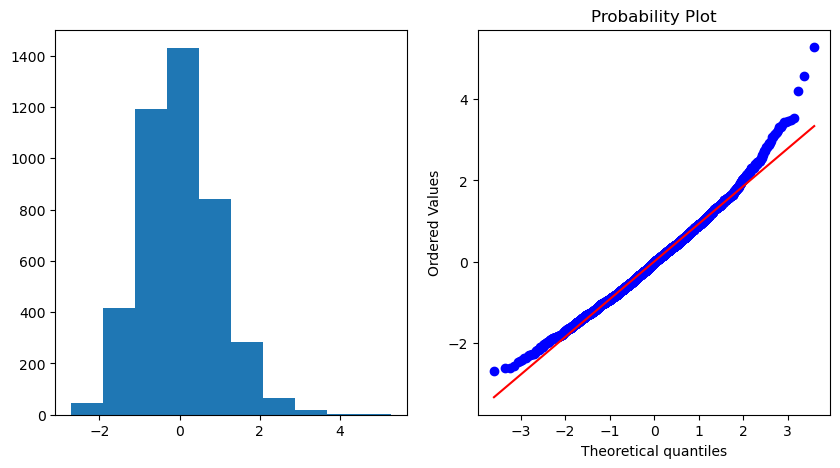

- 2. 등분산성 가정 확인


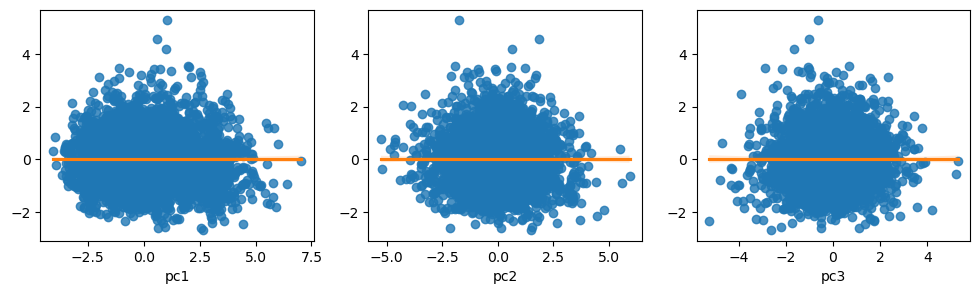

- 3.독립성 가정 확인
 Durbin-watson  통계량 :  1.9897690654379405


In [40]:
print('- 데이터 상관계수 확인')
display(df2_pca.corr())
lr = ols('DBP~pc1+pc2+pc3', data = df2_pca).fit()
print('- 회귀모델 요약')
display(lr.summary())

print('- 잔차 분석')
resid = lr.resid #잔차

print('- 1. 정규성 확인')
stats, p, skew, kurt = jarque_bera(resid)
print('Jarque-bera: stats {:.3f}, p-value {:.3f}'.format(stats, p))
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].hist(resid)
probplot(resid, plot = ax[1])
plt.show()

print('- 2. 등분산성 가정 확인')
fig, ax = plt.subplots(1, 3, figsize = (12, 3))
for feature, ax in zip(['pc1', 'pc2', 'pc3'], ax.ravel()):
    sns.regplot(x = df2_pca[feature], y = resid, line_kws = {'color':'C1'}, ax = ax)
plt.show()

print('- 3.독립성 가정 확인')
dw = durbin_watson(resid)
print(' Durbin-watson  통계량 : ', dw)

#### [답안] (34분)
- DBP를 종속변수, pca로 차원축소한 3개의 변수를 독립변수로 단순 선형회귀분석을 시행했다. 회귀모형은 통계적으로 유의하며 각 변수들도 통계적으로 유의한 것을 볼 수 있다. 그러나 모델의 설명력이 13.1%의 낮은 설명력을 가지고 있다.
- 그 후 잔차가 회귀의 가정을 따르는지 살펴본 결과 
    1. jaque bera 검정에 의해 유의수준 0.05 기준으로 유의확률이 0.00으로 낮으므로 정규분포를 따른다는 귀무가설를 기각하여 정규분포를 따르지 않는다. 
    2. 각 변수별로 잔차와 등분산성을 살펴본 결과 분산이 일정한 것으로 보인다.
    3. 독립성 가정 확인해본 결과 dw값이 2에 가까우므로 잔차 간 독립이다.

## 3-1 회귀분석 알고리즘 3개를 선택하고 선정이유와 장단점 비교

#### [답안] (13분)
- 트리기반의 모델 랜덤포레스트와 부스팅 모델 xgboost, lightgbm을 선정했다. 
	1. 랜덤포레스트는 트리들이 서로 최대한 달라지도록 무작위로 트리를 생성하는 방법이다. 병렬로 실행이 가능하다는 장점이 있고 효율적이다. 그러나 단일 트리보다 정확한 예측성능을 보이지만 직관적인 해석은 불가능하다.
	2. 부스팅모델에서 xboost를 선택한 이유는 정확도 측면에서 뛰어나는 장점을 가지고 있기때문에 선택하였다. 단점은 이 모델 또한 직관적 해석은 불가능하다.
	3. lightgbm을 선택한 이유는 정확도가 높으면서 속도가 빠르다는 장점때문이다. 단점은 이 모델도 직관적 해석 불가하다.

## 3-2. 1-3에서 구분한 데이터를 기준으로 3개의 회귀 분석 모델링을 진행하고 평가지표 rmse로 가장 최적화된 알고리즘 선정

In [59]:
x_train_ar = np.array(x_train)
x_test_ar = np.array(x_test)

rf = RandomForestRegressor(n_estimators = 500, max_depth = 3)
model_rf = rf.fit(x_train_ar, y_train)

xgb = XGBRegressor(max_depth = 5, n_estimators = 500)
model_xgb = xgb.fit(x_train_ar, y_train)

lgb = LGBMRegressor(max_depth = 5, n_estimators = 500)
model_lgb =  lgb.fit(x_train_ar, y_train)

pred_rf = model_rf.predict(x_test_ar)
pred_xgb = model_xgb.predict(x_test_ar)
pred_lgb = model_lgb.predict(x_test_ar)

rmse_rf = rmse(y_test, pred_rf)
rmse_xgb = rmse(y_test, pred_xgb)
rmse_lgb = rmse(y_test, pred_lgb)

print('RMSE 평가 결과 1. rf : {:.3f}, 2. xgboost : {:.3f}, 3. lightgbm : {:.3f}'.format(rmse_rf, rmse_xgb, rmse_lgb))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2168
[LightGBM] [Info] Number of data points in the train set: 3008, number of used features: 11
[LightGBM] [Info] Start training from score 0.001013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

#### [답안]
- 세가지 모델을 실행해본 결과 RMSE는 랜덤포레스트 0.936, XGBOOST 1.054, LightGBM 1.002의 평가가 나왔고 랜덤포레스트가 평가지표의 값이 가장 낮아 이 데이터에서는 세 모델 중 가장 최적화된 알고리즘으로 선정한다. 

## 3-3 3-2에서 가장 성능 좋은 알고리즘을 이용하여 K-Fold 교차검증을 수행하시오.

In [71]:
kfold = KFold(n_splits = 4)

param_grid = {'n_estimators':[200, 300, 400, 500], 'max_depth':[3, 4, 5]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv = kfold)

grid.fit(x_train_ar, y_train)
print('최상의 교차 검증 점수 ',grid.best_score_)
print('최적의 매개변수 ', grid.best_params_)

pred_rf2 = grid.predict(x_test_ar)
rmse_rf2 = rmse(y_test, pred_rf2)

print('RMSE 평가 결과 - 단순모델 rf : {:.3f}, kfold 후 : {:.3f}'.format(rmse_rf, rmse_rf2))

최상의 교차 검증 점수  0.15682354476874324
최적의 매개변수  {'max_depth': 5, 'n_estimators': 400}
RMSE 평가 결과 - 단순모델 rf : 0.936, kfold 후 : 0.933


#### [답안] (28분)
- 랜덤포레스트에 대해 k가 4인 kfold를 수행했다. kfold를 수행하며 매개변수의 값도 조정하는 grid search방법을 적용하였는데 최적의 매개변수는 {'max_depth': 4, 'n_estimators': 200}와 같이 나왔다.
- kfold 적용 전 후의 rmse값을 비교한 결과 단순 모델의 값은 0.936, kfold 적용 후의 값은 0.934로 0.002 정도 모델이 개선되었다.

## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv
- 데이터 설명 : 자전거사고 다발지역 개별사고 정보
1) 대상사고 : 해당 1년간 발생한 가해 또는 피해차종이 자전거인 교통사고
2) 다발지역 선정조건 : 반경 300m 내 대상사고 4건이상 발생지역

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv',encoding='cp949')
df.head()

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각
0,경상,여,75세,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15시
1,중상,여,26세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13시
2,중상,남,34세,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08시
3,경상,남,45세,자전거,경상,차대차 - 기타,맑음,0,2018-06-03 18시
4,중상,남,20세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-06-28 16시


## 4-1 발생시각을 통해 평일인지 주말인지를 구분하는  '주말여부'  범주형 변수 추가하고 데이터 분포를 확인하라. (월 ~ 금은 평일, 토요일과 일요일을 주말)

In [51]:
df[df['주말여부']=='Y']

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,발생날짜,주말여부
1,중상,여,26세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13시,Saturday,Y
3,경상,남,45세,자전거,경상,차대차 - 기타,맑음,0,2018-06-03 18시,Sunday,Y
9,중상,남,67세,승용차,중상,차대차 - 기타,맑음,0,2018-02-11 21시,Sunday,Y
20,경상,여,50세,자전거,경상,차대차 - 기타,맑음,0,2018-06-02 19시,Saturday,Y
24,경상,여,68세,자전거,경상,차대차 - 기타,맑음,0,2018-07-28 09시,Saturday,Y
...,...,...,...,...,...,...,...,...,...,...,...
2397,중상,남,62세,승용차,중상,차대차 - 기타,맑음,0,2020-03-22 11시,Sunday,Y
2399,중상,남,30세,승용차,중상,차대차 - 측면충돌,맑음,0,2020-08-22 05시,Saturday,Y
2400,경상,여,37세,승용차,경상,차대차 - 기타,맑음,0,2020-10-10 21시,Saturday,Y
2401,경상,남,41세,승용차,경상,차대차 - 측면충돌,맑음,0,2020-10-25 13시,Sunday,Y


In [54]:
import datetime as dt
import time

발생날짜 = pd.Series([dt.datetime.strptime(t, '%Y-%m-%d %H시').strftime('%Y-%m-%d') for t in df['발생시각']])
요일 = 발생날짜.astype('datetime64[ns]').dt.day_name()

df['주말여부'] = list(map(lambda x: 1 if (x =='Sunday')|(x == 'Saturday') else 0, 요일))

print(df['주말여부'].value_counts())


주말여부
0    1815
1     595
Name: count, dtype: int64


#### [답안] 20분
- 발생시각을 날짜로 바꾸고 요일을 추출하여 주말여부 변수를 만들었다. 그 결과 주말(1)은 595건, 평일(0)은 1815건이다.

## 4-2 사고내용에 따라 각 독립변수들(가해자성별,가해자연령,가해자차종,사고유형,기상상태,주말여부 등)이 유의한지 통계적 검정하라.

## 4-3 4-2 에서 유의한 변수들만 가지고 SMOTE 오버샘플링을 수행하고 범주형변수는 변수별 빈도를 나타내고 연속형이면 평균을 나타내시오

## 4-4 4-3 데이터를 가지고 사고내용을 종속변수로 하여 로지스틱회귀분석, XGB 분류 분류 모델을 만들고 성능 비교를 하고 영향력 있는 변수를 확인하라

# 통계 (40점)

## 5. 
3개의 공장에서 생산한 제품을 3지역으로 가능한 조건에 맞게 최대로 배송한다.    
각 공장과 각 지역 사이의 1개 제품 배송 비용이 아래와 같을 때, 최소 배송 비용은 얼마인가?    
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p5.png)

## 데이터 설명
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv
- 데이터 설명 : 3개 연령층 (청년 장년 노년)의 A 헤드셋의 선호도 (1,2,3) 설문조사

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv')
df.head()

,나이,선호도
0,청년,2
1,장년,2
2,청년,2
3,청년,1
4,장년,1


## 6.1 연령대별로 헤드셋 선호도에 차이가 있는지를 검정하기 위한 귀무가설과 연구가설을 설정해라.

## 6.2 유의수준 하에서 통계 검정해라

## 데이터 설명
아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5이다.

## 7.1 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라.

## 7.2 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가? 

created by datamanim [web-link](https://www.datamanim.com)